<IPython.core.display.Javascript object>


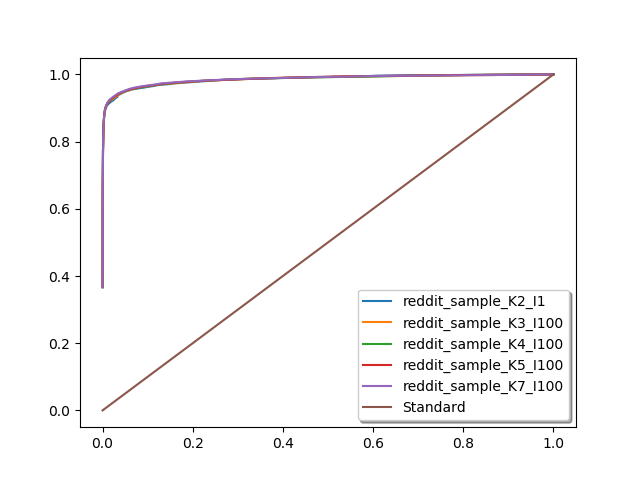

reddit_sample_K2_I1	[0.9855599412038688, 196.88894315377038]
reddit_sample_K3_I100	[0.9854883450009865, 198.04107959136238]
reddit_sample_K4_I100	[0.9856542487999153, 195.78094251181528]
reddit_sample_K5_I100	[0.9859980316346287, 191.05454957996216]
reddit_sample_K7_I100	[0.9862189272110915, 188.0896315952584]


In [18]:
%matplotlib notebook
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = "D:/Research/Project/LDA/results/190718/"
datasetname = "reddit_sample"
time_str = ""
sss = [datasetname+"_K2_I1",
       datasetname+"_K3_I100",
       datasetname+"_K4_I100",
       datasetname+"_K5_I100",
       datasetname+"_K7_I100"]

index = 0
for filename in sss:
    full_path = path+datasetname+time_str+"/" + filename + ".csv"
    ranks = pd.read_csv(full_path, index_col=0)
    max_rank = max(ranks['rank'].values)
    num_record = len(ranks['rank'])
    # print(max_rank)
    
    unique, counts = np.unique(ranks['rank'].values, return_counts=True)
    cum_counts = np.cumsum(counts) / num_record
    
    auc = 0.0
    prev_value = [0, 0]
    for value in zip(unique / max_rank, cum_counts):
        if prev_value[0] != 0:
            s = (value[1] + prev_value[1]) / 2 * (value[0] - prev_value[0])
            auc += s
        prev_value = value
    
    plt.plot(unique / max_rank, cum_counts, label=sss[index])
    print(sss[index] + "\t" + str([auc, np.mean(ranks['rank'].values)]))
    index += 1

plt.plot([0.0, 1.0], [0.0, 1.0], label="Standard")

legend = plt.legend(loc='lower right', shadow=True, fontsize='medium')
plt.show()
